# Import important library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from scipy.stats import norm, skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

target = 'Salinity'

# Data Loading and Preview

In [2]:
data = pd.read_csv('/kaggle/input/capstone-dataset/salinity_germany_data.csv')
data.head()

,Unnamed: 0,Date/Time,"Temp [°C] (CTD, Sea-Bird, SBE 37-SI Micr...)","Sal (CTD, Sea-Bird, SBE 37-SI Micr...)","O2 [µmol/l] (Oxygen optode, Aanderaa type ...)",O2 [µmol/l] (Corrected),DO [ml/l] (Corrected),O2 [mg/l] (Corrected),O2 sat [%] (Corrected),Latitude,Longitude,Station,Date,B01,B02,B03,B04,B05,B06,B07
0,0,2014-09-15 16:10:00,17.80,16.98,338.69,303.92,6.80,9.72,113.43,54.330192,10.149911,1,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.02437,0.025011,0.001926
1,1,2014-09-15 16:20:00,17.81,16.97,339.23,304.41,6.82,9.74,113.64,54.330192,10.149911,1,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.02437,0.025011,0.001926
2,2,2014-09-15 16:30:00,17.79,16.97,340.91,305.91,6.85,9.79,114.17,54.330192,10.149911,1,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.02437,0.025011,0.001926
3,3,2014-09-15 16:40:00,17.80,16.97,340.46,305.51,6.84,9.77,114.03,54.330192,10.149911,1,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.02437,0.025011,0.001926
4,4,2014-09-15 16:50:00,17.80,16.97,343.69,308.41,6.91,9.87,115.11,54.330192,10.149911,1,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.02437,0.025011,0.001926


In [3]:
#Drop unnecessary and irrelevant features (according to the study hypothesis)
data = data.drop(columns = ['Unnamed: 0','Temp [°C] (CTD, Sea-Bird, SBE 37-SI Micr...)','O2 [µmol/l] (Oxygen optode, Aanderaa type ...)',
       'O2 [µmol/l] (Corrected)', 'DO [ml/l] (Corrected)',
       'O2 [mg/l] (Corrected)', 'O2 sat [%] (Corrected)', 'Latitude',
       'Longitude', 'Station','Date/Time'],axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220445 entries, 0 to 220444
Data columns (total 9 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Sal (CTD, Sea-Bird, SBE 37-SI Micr...)  220445 non-null  float64
 1   Date                                    220445 non-null  object 
 2   B01                                     220445 non-null  float64
 3   B02                                     220445 non-null  float64
 4   B03                                     220445 non-null  float64
 5   B04                                     220445 non-null  float64
 6   B05                                     220445 non-null  float64
 7   B06                                     220445 non-null  float64
 8   B07                                     220445 non-null  float64
dtypes: float64(8), object(1)
memory usage: 15.1+ MB


In [5]:
data.columns = data.columns.str.strip()
data = data.rename(columns={'Sal (CTD, Sea-Bird, SBE 37-SI Micr...)': 'Salinity'})
data

,Salinity,Date,B01,B02,B03,B04,B05,B06,B07
0,16.98,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.024370,0.025011,0.001926
1,16.97,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.024370,0.025011,0.001926
2,16.97,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.024370,0.025011,0.001926
3,16.97,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.024370,0.025011,0.001926
4,16.97,2014-09-15,0.003589,0.105031,0.001661,0.001464,0.024370,0.025011,0.001926
...,...,...,...,...,...,...,...,...,...
220440,18.17,2019-09-12,1.030664,1.132340,0.985677,0.920928,1.129172,1.684503,0.882512
220441,18.12,2019-09-12,1.030664,1.132340,0.985677,0.920928,1.129172,1.684503,0.882512
220442,18.14,2019-09-12,1.030664,1.132340,0.985677,0.920928,1.129172,1.684503,0.882512
220443,18.13,2019-09-12,1.030664,1.132340,0.985677,0.920928,1.129172,1.684503,0.882512


# Exploratory Data Analysis (EDA)

In [6]:
data.describe()

,Salinity,B01,B02,B03,B04,B05,B06,B07
count,220445.000000,220445.000000,220445.000000,220445.000000,220445.000000,220445.000000,220445.000000,220445.000000
mean,16.558317,0.383201,0.475021,0.367752,0.350351,0.411923,0.655203,0.358345
std,2.658128,0.630615,0.636455,0.636541,0.629013,0.641491,0.797713,0.634029
min,8.090000,0.000000,0.000264,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.910000,0.011386,0.063596,0.003509,0.001970,0.015609,0.028974,0.002496
50%,16.490000,0.073539,0.210671,0.046518,0.030465,0.103183,0.259427,0.035855
75%,18.310000,0.400595,0.588206,0.373400,0.337734,0.485547,1.109791,0.364803
max,24.170000,2.966497,2.975237,2.967811,2.962439,2.972086,2.987856,2.964583


##  Target Variable Distribution 

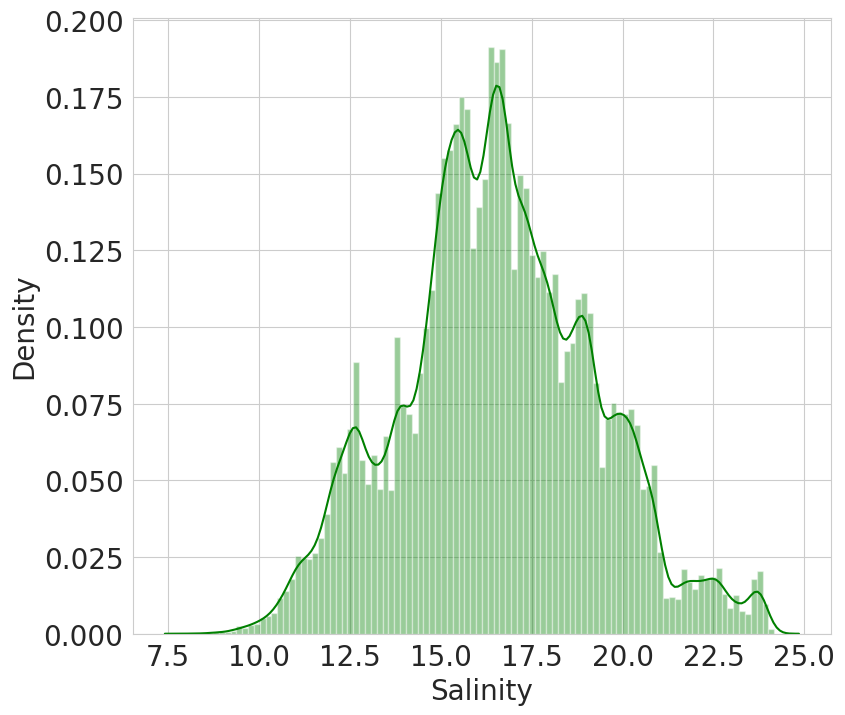

In [7]:
plt.figure(figsize=(9, 8))
sns.distplot(data[target], color='g', bins=100, hist_kws={'alpha': 0.4})

# Adjust font sizes
plt.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
plt.xlabel('Salinity', fontsize=20)  # X-axis label
plt.ylabel('Density', fontsize=20)  # Y-axis label

plt.savefig('german_distribution.png')

<Axes: xlabel='Salinity'>

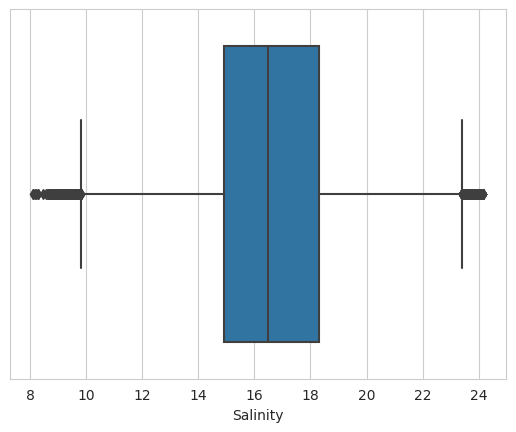

In [8]:
import seaborn as sns
sns.boxplot(x=data['Salinity'])

## Numeric distribution 

B01 Analytics
isnull:
   Null: 0


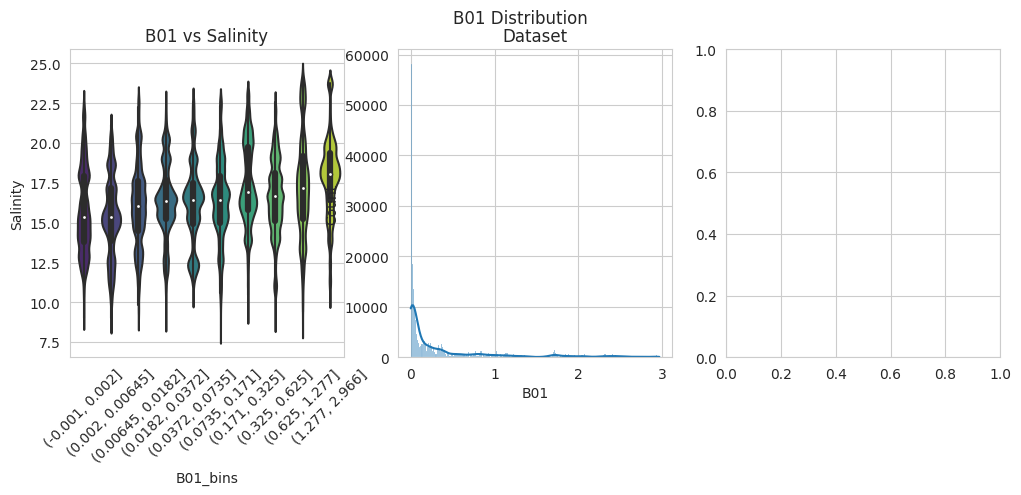

B02 Analytics
isnull:
   Null: 0


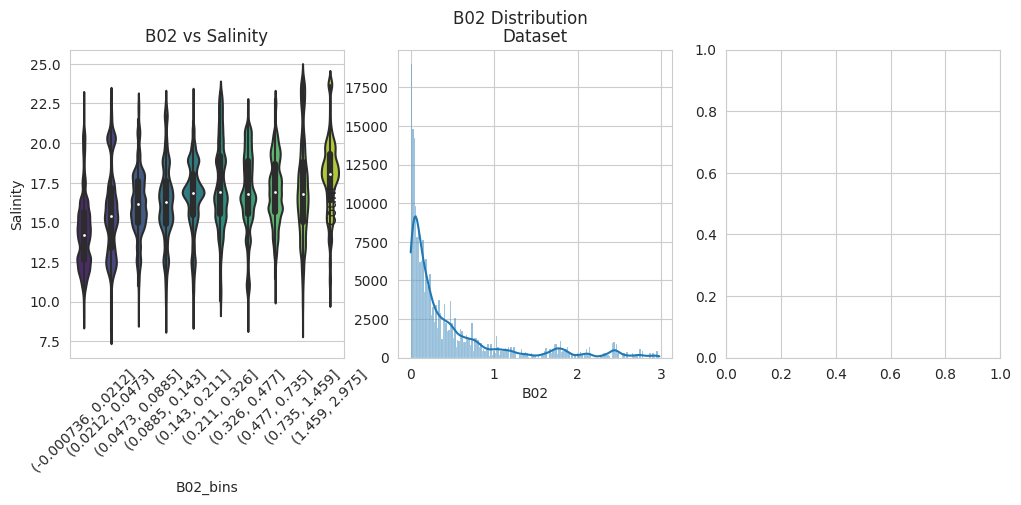

B03 Analytics
isnull:
   Null: 0


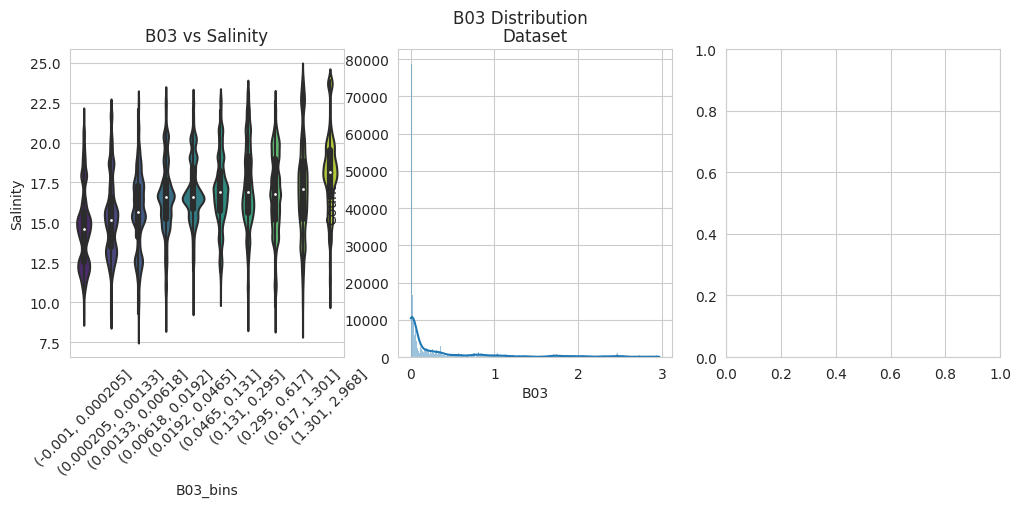

B04 Analytics
isnull:
   Null: 0


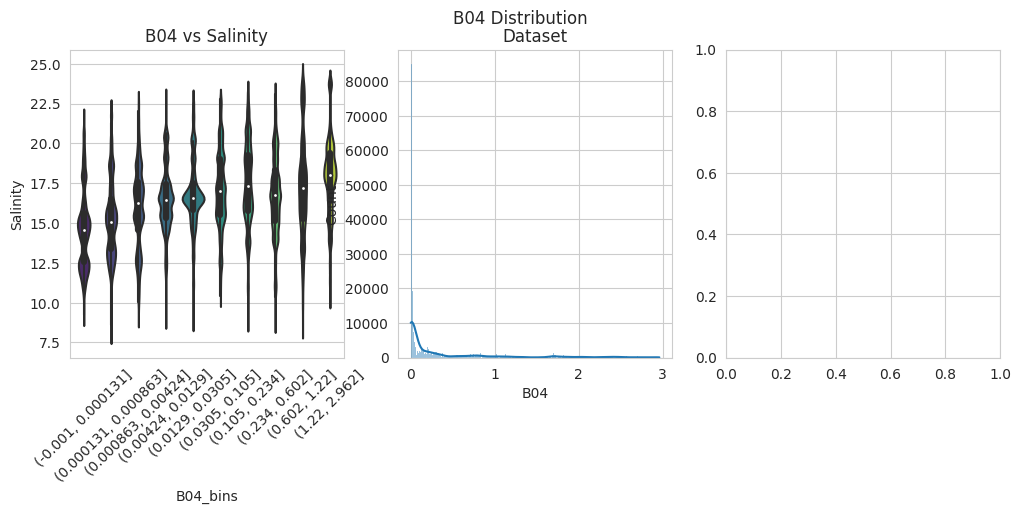

B05 Analytics
isnull:
   Null: 0


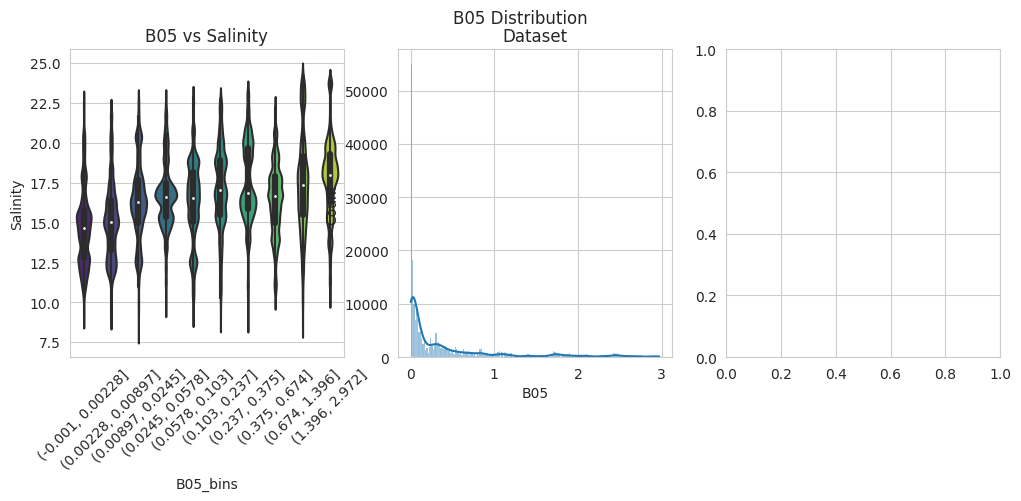

B06 Analytics
isnull:
   Null: 0


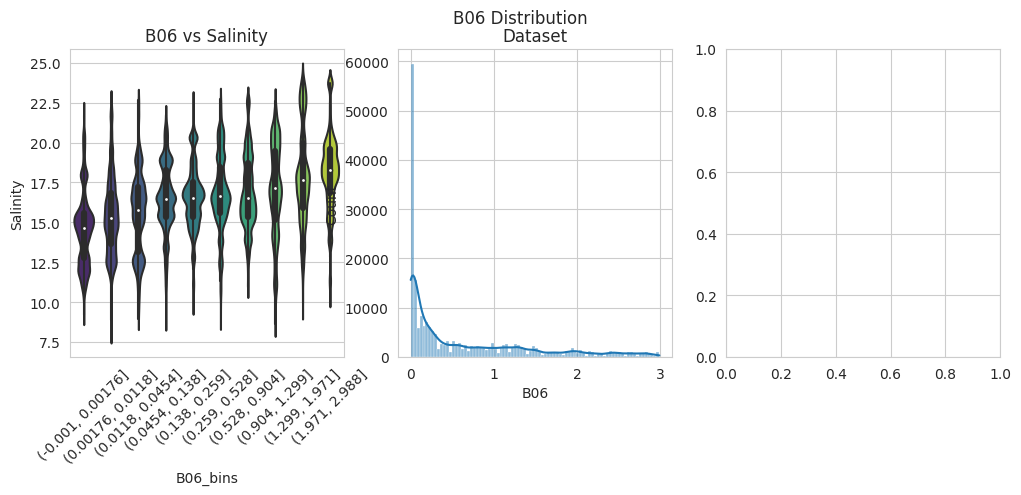

B07 Analytics
isnull:
   Null: 0


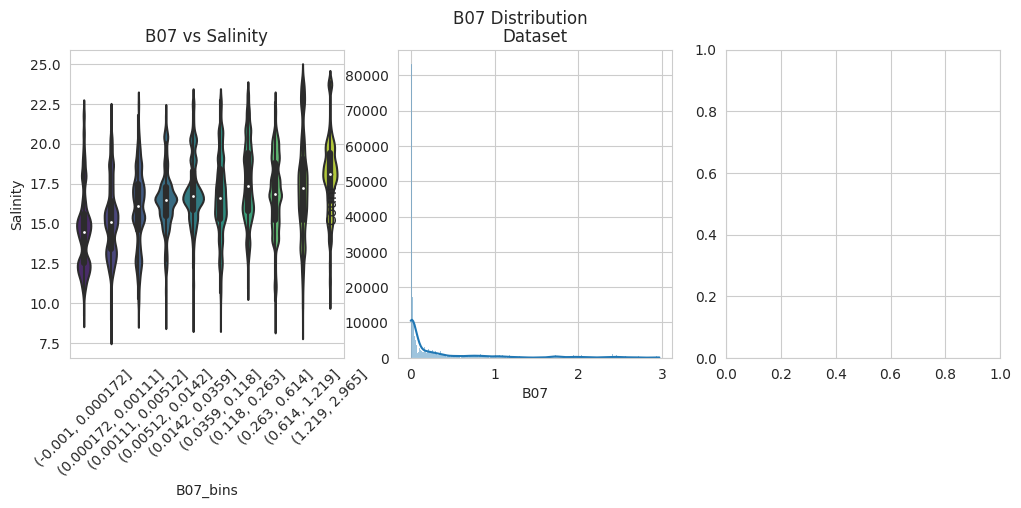

In [9]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target]  # excluding target

# ----- Numeric Features EDA -----
num_bin = 10
for col in numeric_cols:
    print(f"{col} Analytics")
    print(f"isnull:\n   Null: {data[col].isnull().sum()}")
    data[f"{col}_bins"] = pd.qcut(data[col], q=num_bin, duplicates='drop')
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    sns.violinplot(x=f"{col}_bins", y=target, data=data, palette='viridis', ax=ax[0])
    sns.histplot(data[col], kde=True, palette='viridis', ax=ax[1])
    fig.suptitle(f"{col} Distribution")
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].set_title(f"{col} vs {target}")
    ax[1].set_title("Dataset")
    plt.show()
    data.drop(columns=f"{col}_bins", inplace=True)

In [10]:
# Sum of negative values for each column
sum_negatives_per_column = data[numeric_cols][data[numeric_cols] < 0].sum()
print("Sum of negative values per column:")
print(sum_negatives_per_column)

Sum of negative values per column:
B01    0.0
B02    0.0
B03    0.0
B04    0.0
B05    0.0
B06    0.0
B07    0.0
dtype: float64


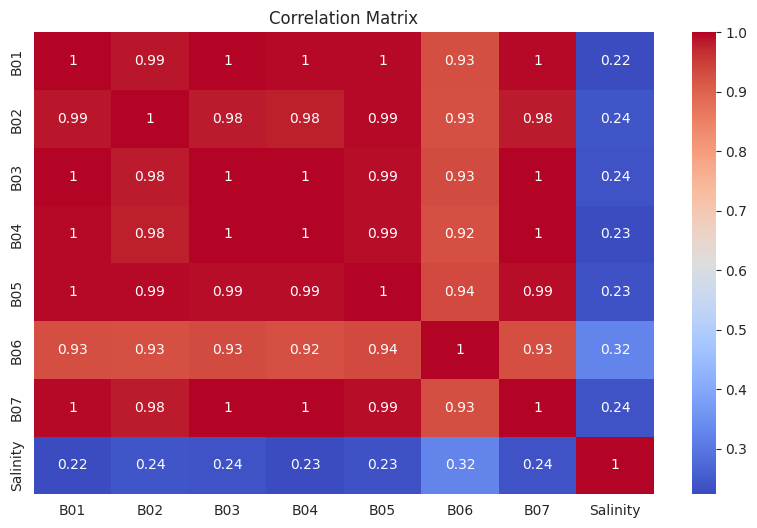

In [11]:
#Check the correlation matrix
plt.figure(figsize=(10,6))
corr = data[numeric_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing 

In [12]:
# Convert 'Date' column to datetime objects if not already done
data['Date'] = pd.to_datetime(data['Date'])
#Feature Engineering Extract Date columns to day/ month/ year
data['Day'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


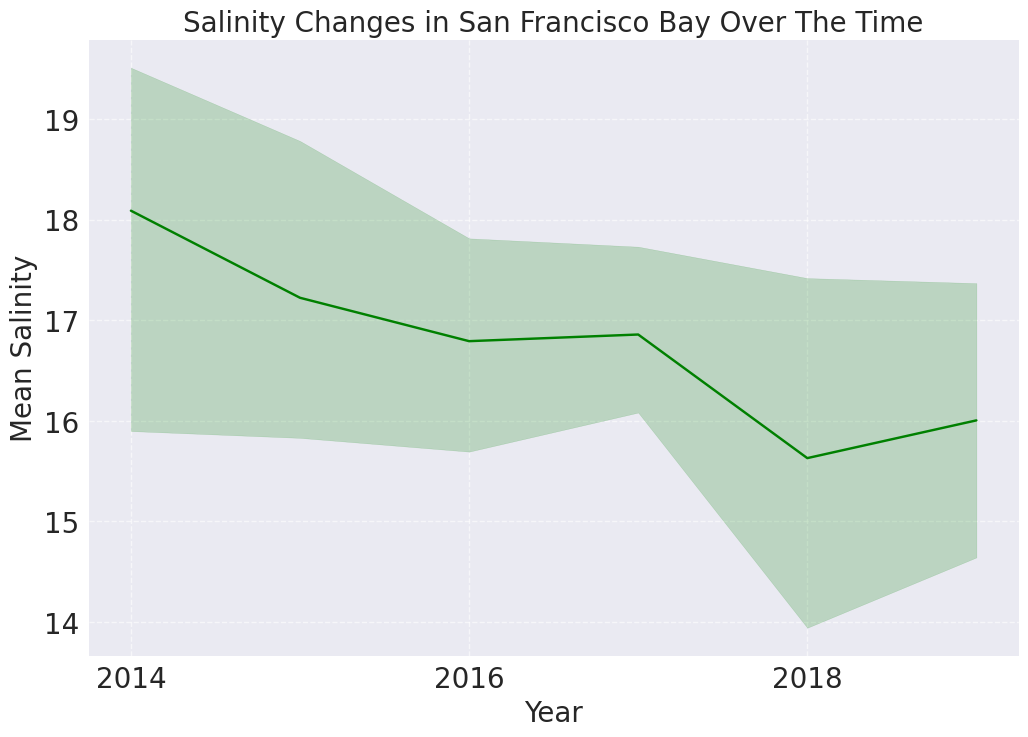

<Figure size 800x550 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Aggregating data to calculate mean salinity per day
df_daily_mean = data[['Month','Year','Salinity']].groupby(['Month','Year'], as_index=False)['Salinity'].mean()

# Setting up the style
plt.style.use("seaborn")

# Plotting the daily mean salinity
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_daily_mean, x='Year', y='Salinity', color='green')
plt.title('Salinity Changes in San Francisco Bay Over The Time', fontsize=20)
# Customizing the x-axis date format
# Manually setting x-axis ticks and labels
# Manually set the ticks on the x-axis to integers
plt.xticks(ticks=range(int(df_daily_mean['Year'].min()), int(df_daily_mean['Year'].max())+1,2))
plt.tick_params(axis='both', which='major', labelsize=20)  # Tick labels

plt.ylabel('Mean Salinity', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('salinity_change_german.png')

In [14]:
Q1 = data[target].quantile(0.25)
Q3 = data[target].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data[target] < Q1 - 1.5 * IQR) | (data[target] > Q3 + 1.5 * IQR)]
print("Outliers:")
print(outliers.head())

Outliers:
       Salinity       Date       B01       B02       B03       B04       B05  \
46871     23.48 2015-12-17  1.229638  1.220716  1.368086  1.168078  1.240657   
46905     23.42 2015-12-17  1.229638  1.220716  1.368086  1.168078  1.240657   
46907     23.41 2015-12-17  1.229638  1.220716  1.368086  1.168078  1.240657   
46908     23.41 2015-12-17  1.229638  1.220716  1.368086  1.168078  1.240657   
46909     23.42 2015-12-17  1.229638  1.220716  1.368086  1.168078  1.240657   

            B06       B07   Day  Month  Year  
46871  1.852858  1.181676  2015     12  2015  
46905  1.852858  1.181676  2015     12  2015  
46907  1.852858  1.181676  2015     12  2015  
46908  1.852858  1.181676  2015     12  2015  
46909  1.852858  1.181676  2015     12  2015  


In [15]:
data.nunique()

Salinity    1536
Date        1589
B01         1476
B02         1565
B03         1350
B04         1322
B05         1495
B06         1485
B07         1342
Day            6
Month         12
Year           6
dtype: int64

In [16]:
data.shape

(220445, 12)

In [17]:
data.drop_duplicates(inplace=True)
data.shape

(84587, 12)


 mu = 16.27 and sigma = 2.69



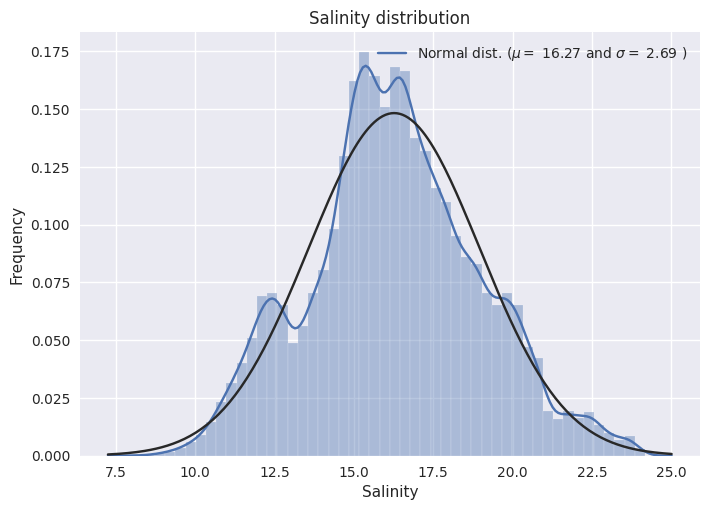

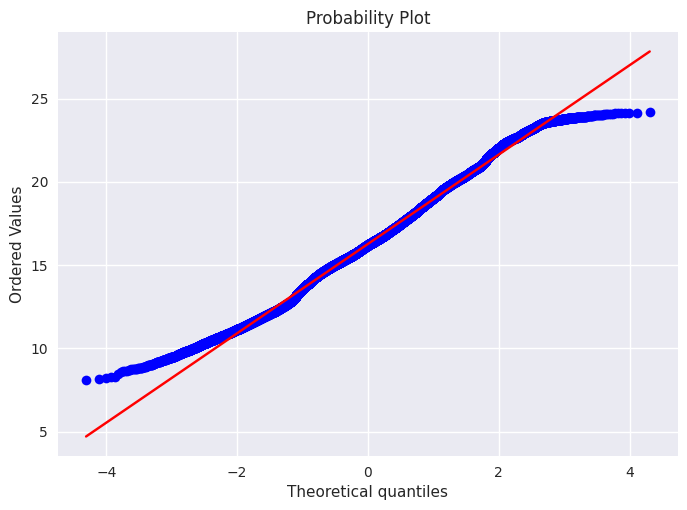

In [18]:
sns.distplot(data[target] , fit=norm);

(mu, sigma) = norm.fit(data[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Salinity distribution')

fig = plt.figure()
res = stats.probplot(data[target], plot=plt)
plt.show()

# Data training and testing set

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'target' is the target variable column name

# Example Data (replace with your data)
X = data[['Day','Month', 'Year', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07']]  # Your features
y = data[target]  # Your target

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Combine features and target for saving to CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_data.to_csv("training_set.csv", index=False)
test_data.to_csv("testing_set.csv", index=False)